In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import glob
from tidegauge_functions import read_GPS_nam14_UNAVCO,convert_trend_toyearly

%matplotlib inline

In [2]:
datum = '????'
ext = '.csv'
meth = '.cwu.nam14'
dir_in = 'data/GPS'


In [3]:
pattern = os.path.join(dir_in, datum + meth + ext)
print(pattern)

data/GPS\????.cwu.nam14.csv


In [4]:
filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)

In [5]:
for f, filepath in enumerate(filenames):
    df = read_GPS_nam14_UNAVCO(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS\ASKY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-20   0.00  0.00      0.00      2.00     1.53         9.87   repro
2007-08-21   1.82 -0.63     -2.30      2.02     1.53         9.82   repro
2007-08-22  -0.98  0.33     -3.36      2.01     1.54         9.82   repro
2007-08-23  -0.35 -1.54     -4.23      1.97     1.51         9.60   repro
2007-08-24  -0.76 -1.11     -1.18      2.05     1.57        10.15   repro


data/GPS\BLAS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-07-08   0.00  0.00      0.00      1.91     1.59        10.91   repro
2008-07-09   0.30  0.73     -8.95      1.93     1.59        11.11   repro
2008-07-10   1.84 -0.15    -13.82      2.03     1.70        11.66   repro
2008-07-11  -0.48  0.64    -16.57      1.99     1.60



data/GPS\KSNB.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-08-21   0.00  0.00      0.00      2.33     1.64         8.63   repro
2007-08-22  -3.50 -1.07      9.86      2.25     1.59         8.34   repro
2007-08-23  -3.78 -2.42      5.54      2.33     1.61         8.53   repro
2007-08-24  -1.33 -1.31      8.31      2.30     1.63         8.54   repro
2007-08-25  -1.36 -1.44      4.93      2.35     1.65         8.69   repro


data/GPS\KUAQ.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2009-08-07   0.00  0.00      0.00      2.37     1.68         8.97   repro
2009-08-08  -0.52 -0.12     -0.05      2.27     1.57         8.41   repro
2009-08-09   1.54 -0.63      4.69      2.29     1.61         8.57   repro
2009-08-10   0.22 -0.99      5.74      2.22     1.56

data/GPS\SCBY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2007-09-09   0.00  0.00      0.00      2.02     1.62        12.23   repro
2007-09-10  -1.05  0.48     -0.98      1.90     1.55        11.63   repro
2007-09-11   0.74 -1.11     -2.80      1.92     1.55        11.70   repro
2007-09-12   0.74 -1.16     -2.59      1.90     1.55        11.56   repro
2007-09-13   0.42 -0.02     -1.18      1.88     1.55        11.48   repro


data/GPS\SENU.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality
Date                                                                     
2008-05-17   0.00  0.00      0.00      2.37     1.60         7.63   repro
2008-05-18  -0.87 -0.81      1.65      2.28     1.58         7.45   repro
2008-05-19   0.73 -1.12      2.09      2.30     1.58         7.46   repro
2008-05-20   0.22 -0.93      0.36      2.36     1.64  

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, var, site, period):  
    
    decomposition = seasonal_decompose(df[var], freq = period)

    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    Amplitude = max(seasonal) - min(seasonal)
    
    decomposition.plot();
    df['denoised'] = df[var] - residual
    df['trend'] = trend
    print(f'\n\n{filepath}')
    print(df.head())
    print(f'{site} Seasonal Amplitude =', Amplitude)
    #seasonal_amp = pd.DataFrame(list(zip(list({site}), list(Amplitude))),
                            #colums = ['Site_Name', 'Seasonal_Amplitude'])
    #seasonal_amp.to_csv('GPS_Seasonal_Amplitude_SONEL')



data/GPS\ASKY.cwu.nam14.csv
f: 0


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\ASKY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-20   0.00  0.00      0.00      2.00     1.53         9.87   repro   
2007-08-21   1.82 -0.63     -2.30      2.02     1.53         9.82   repro   
2007-08-22  -0.98  0.33     -3.36      2.01     1.54         9.82   repro   
2007-08-23  -0.35 -1.54     -4.23      1.97     1.51         9.60   repro   
2007-08-24  -0.76 -1.11     -1.18      2.05     1.57        10.15   repro   

            denoised  trend  
Date                         
2007-08-20       NaN    NaN  
2007-08-21       NaN    NaN  
2007-08-22       NaN    NaN  
2007-08-23       NaN    NaN  
2007-08-24       NaN    NaN  
ASKY Seasonal Amplitude = 18.1578


data/GPS\BLAS.cwu.nam14.csv
f: 1


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\BLAS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-08   0.00  0.00      0.00      1.91     1.59        10.91   repro   
2008-07-09   0.30  0.73     -8.95      1.93     1.59        11.11   repro   
2008-07-10   1.84 -0.15    -13.82      2.03     1.70        11.66   repro   
2008-07-11  -0.48  0.64    -16.57      1.99     1.60        11.33   repro   
2008-07-12   0.11  0.73    -10.42      1.98     1.62        11.41   repro   

            denoised  trend  
Date                         
2008-07-08       NaN    NaN  
2008-07-09       NaN    NaN  
2008-07-10       NaN    NaN  
2008-07-11       NaN    NaN  
2008-07-12       NaN    NaN  
BLAS Seasonal Amplitude = 16.197490410958906


data/GPS\DGJG.cwu.nam14.csv
f: 2


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\DGJG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-12   0.00  0.00      0.00      2.12     1.54         8.81   repro   
2009-08-13   0.51  0.57     -2.27      2.16     1.56         8.83   repro   
2009-08-14   2.58 -0.28     10.04      2.16     1.53         8.83   repro   
2009-08-15   1.54 -0.15     -0.30      2.18     1.54         8.93   repro   
2009-08-16   2.37 -1.37      4.08      2.16     1.55         8.85   repro   

            denoised  trend  
Date                         
2009-08-12       NaN    NaN  
2009-08-13       NaN    NaN  
2009-08-14       NaN    NaN  
2009-08-15       NaN    NaN  
2009-08-16       NaN    NaN  
DGJG Seasonal Amplitude = 19.902273972602742


data/GPS\DKSG.cwu.nam14.csv
f: 3


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\DKSG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-22   0.00  0.00      0.00      1.99     1.54        10.02   repro   
2007-08-23  -0.82 -0.62     -2.66      2.06     1.59        10.35   repro   
2007-08-24   0.32  0.37      1.24      2.00     1.56        10.05   repro   
2007-08-25  -0.07 -0.27     -5.78      2.02     1.53        10.14   repro   
2007-08-26   0.82  0.34     -4.93      2.12     1.59        10.67   repro   

            denoised  trend  
Date                         
2007-08-22       NaN    NaN  
2007-08-23       NaN    NaN  
2007-08-24       NaN    NaN  
2007-08-25       NaN    NaN  
2007-08-26       NaN    NaN  
DKSG Seasonal Amplitude = 18.85489315068493


data/GPS\GMMA.cwu.nam14.csv
f: 4


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\GMMA.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-20   0.00  0.00      0.00      2.05     1.61        11.10   repro   
2009-08-21  -0.71  0.89      2.31      2.00     1.59        10.70   repro   
2009-08-22 -17.56  1.05     36.34      2.06     1.65        11.13   repro   
2009-08-23  -8.12  7.33     31.76      2.02     1.61        10.87   repro   
2009-08-24  -2.63 -0.43      1.11      1.99     1.57        10.56   repro   

            denoised  trend  
Date                         
2009-08-20       NaN    NaN  
2009-08-21       NaN    NaN  
2009-08-22       NaN    NaN  
2009-08-23       NaN    NaN  
2009-08-24       NaN    NaN  
GMMA Seasonal Amplitude = 17.14085273972603


data/GPS\GROK.cwu.nam14.csv
f: 5


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\GROK.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-08   0.00  0.00      0.00      1.95     1.58        10.61   repro   
2008-07-09   0.50  2.39      7.82      2.00     1.61        10.84   repro   
2008-07-10   1.25  1.47     14.88      1.97     1.63        10.84   repro   
2008-07-11   1.90  1.08      6.51      2.02     1.65        11.08   repro   
2008-07-12   1.41  1.96      7.59      2.08     1.69        11.56   repro   

            denoised  trend  
Date                         
2008-07-08       NaN    NaN  
2008-07-09       NaN    NaN  
2008-07-10       NaN    NaN  
2008-07-11       NaN    NaN  
2008-07-12       NaN    NaN  
GROK Seasonal Amplitude = 18.368748194271483


data/GPS\HEL2.cwu.nam14.csv
f: 6


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\HEL2.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-25   0.00  0.00      0.00      2.40     1.67         8.87   repro   
2007-08-26  -1.66 -0.16     -5.27      2.68     1.87        10.18   repro   
2007-08-27  -3.55  0.48     -5.49      2.60     1.79         9.67   repro   
2007-08-28  -3.18  0.99     -5.23      2.31     1.61         8.50   repro   
2007-08-29   0.15 -0.51     -1.83      2.37     1.68         8.82   repro   

            denoised  trend  
Date                         
2007-08-25       NaN    NaN  
2007-08-26       NaN    NaN  
2007-08-27       NaN    NaN  
2007-08-28       NaN    NaN  
2007-08-29       NaN    NaN  
HEL2 Seasonal Amplitude = 23.666767123287674


data/GPS\HJOR.cwu.nam14.csv
f: 7


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\HJOR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-14   0.00  0.00      0.00      2.41     1.62         8.17   repro   
2007-08-15  -3.08 -0.75      4.43      2.49     1.71         8.53   repro   
2007-08-16  -2.98  0.00      6.66      2.49     1.73         8.39   repro   
2007-08-17  -0.33  0.13      6.11      2.35     1.60         7.84   repro   
2007-08-18  -2.31  1.29      1.65      2.32     1.59         8.07   repro   

            denoised  trend  
Date                         
2007-08-14       NaN    NaN  
2007-08-15       NaN    NaN  
2007-08-16       NaN    NaN  
2007-08-17       NaN    NaN  
2007-08-18       NaN    NaN  
HJOR Seasonal Amplitude = 17.314990244914902


data/GPS\HMBG.cwu.nam14.csv
f: 8


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\HMBG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-13   0.00  0.00      0.00      2.12     1.57         9.48   repro   
2009-08-14   1.12 -0.46     11.09      2.12     1.55         9.50   repro   
2009-08-15   2.00 -1.06      7.21      2.71     2.08        11.92   repro   
2009-08-16   2.37 -1.68      4.64      2.12     1.54         9.36   repro   
2009-08-17   1.64 -0.92      8.15      2.11     1.54         9.37   repro   

            denoised  trend  
Date                         
2009-08-13       NaN    NaN  
2009-08-14       NaN    NaN  
2009-08-15       NaN    NaN  
2009-08-16       NaN    NaN  
2009-08-17       NaN    NaN  
HMBG Seasonal Amplitude = 22.09952602739726


data/GPS\HRDG.cwu.nam14.csv
f: 9


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\HRDG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-11   0.00  0.00      0.00      1.89     1.58        12.12   repro   
2008-07-12   1.24  0.06      3.86      1.81     1.54        11.56   repro   
2008-07-13  -0.71  1.35      3.58      1.82     1.60        11.67   repro   
2008-07-14  -0.38  2.89     11.72      1.81     1.54        11.59   repro   
2008-07-15   0.02  2.15     10.21      1.84     1.55        11.86   repro   

            denoised  trend  
Date                         
2008-07-11       NaN    NaN  
2008-07-12       NaN    NaN  
2008-07-13       NaN    NaN  
2008-07-14       NaN    NaN  
2008-07-15       NaN    NaN  
HRDG Seasonal Amplitude = 14.782539726027395


data/GPS\JGBL.cwu.nam14.csv
f: 10


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\JGBL.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-11   0.00  0.00      0.00      1.81     1.55        11.73   repro   
2008-07-12   3.17 -0.53     -0.62      1.79     1.57        11.80   repro   
2008-07-13   0.09  0.99     -1.29      1.81     1.58        11.78   repro   
2008-07-14   0.55  1.63      0.66      1.79     1.56        11.72   repro   
2008-07-15  -0.17  1.65     -4.51      1.82     1.57        11.91   repro   

            denoised  trend  
Date                         
2008-07-11       NaN    NaN  
2008-07-12       NaN    NaN  
2008-07-13       NaN    NaN  
2008-07-14       NaN    NaN  
2008-07-15       NaN    NaN  
JGBL Seasonal Amplitude = 14.327818181818179


data/GPS\JWLF.cwu.nam14.csv
f: 11


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\JWLF.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-17   0.00  0.00      0.00      1.76     1.53        11.94   repro   
2008-07-18   1.00 -1.08      1.38      1.82     1.65        12.41   repro   
2008-07-19  -0.21 -1.96      1.45      1.83     1.65        12.35   repro   
2008-07-20   1.30 -1.74     -1.72      1.80     1.56        12.15   repro   
2008-07-21   0.08 -0.23     -8.61      1.77     1.52        11.96   repro   

            denoised  trend  
Date                         
2008-07-17       NaN    NaN  
2008-07-18       NaN    NaN  
2008-07-19       NaN    NaN  
2008-07-20       NaN    NaN  
2008-07-21       NaN    NaN  
JWLF Seasonal Amplitude = 15.596904718417045


data/GPS\KAGA.cwu.nam14.csv
f: 12


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KAGA.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2006-05-24   0.00  0.00      0.00      6.63     5.10        28.36   repro   
2006-05-25  -3.98 -1.23     -7.44      2.35     1.66         8.77   repro   
2006-05-26  -3.88 -1.27     -5.04      2.42     1.66         8.98   repro   
2006-05-27  -4.42 -0.53    -10.20      2.26     1.59         8.62   repro   
2006-05-28  -4.51 -0.88    -19.38      2.30     1.61         8.68   repro   

            denoised  trend  
Date                         
2006-05-24       NaN    NaN  
2006-05-25       NaN    NaN  
2006-05-26       NaN    NaN  
2006-05-27       NaN    NaN  
2006-05-28       NaN    NaN  
KAGA Seasonal Amplitude = 46.040120126448905


data/GPS\KAGZ.cwu.nam14.csv
f: 13


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KAGZ.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-30   0.00  0.00      0.00      1.93     1.61        10.86   repro   
2007-08-31   0.15 -0.77      1.26      1.87     1.53        10.80   repro   
2007-09-01   2.19 -1.01      5.36      1.90     1.51        10.85   repro   
2007-09-02   1.09  0.13      2.52      1.92     1.52        11.00   repro   
2007-09-03   2.72 -2.49      3.52      1.90     1.50        10.88   repro   

            denoised  trend  
Date                         
2007-08-30       NaN    NaN  
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
2007-09-02       NaN    NaN  
2007-09-03       NaN    NaN  
KAGZ Seasonal Amplitude = 14.635622526636228


data/GPS\KBUG.cwu.nam14.csv
f: 14


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KBUG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-28   0.00  0.00      0.00      2.30     1.62         8.31   repro   
2007-08-29   0.87 -0.70      3.19      2.35     1.66         8.43   repro   
2007-08-30   0.21  0.59      5.13      2.37     1.69         8.48   repro   
2007-08-31  -0.21 -0.80      6.61      2.34     1.63         8.59   repro   
2007-09-01   0.28 -1.02      6.12      2.43     1.71         8.95   repro   

            denoised  trend  
Date                         
2007-08-28       NaN    NaN  
2007-08-29       NaN    NaN  
2007-08-30       NaN    NaN  
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
KBUG Seasonal Amplitude = 16.03631880448318


data/GPS\KMJP.cwu.nam14.csv
f: 15


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KMJP.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-16   0.00  0.00      0.00      1.84     1.58        12.91   repro   
2008-07-17   0.97  0.53     -2.31      1.78     1.59        12.41   repro   
2008-07-18   1.93 -0.18     -4.24      1.83     1.61        12.59   repro   
2008-07-19   0.58  0.48     -6.43      1.80     1.59        12.47   repro   
2008-07-20   1.59 -0.05      3.32      1.73     1.54        12.08   repro   

            denoised  trend  
Date                         
2008-07-16       NaN    NaN  
2008-07-17       NaN    NaN  
2008-07-18       NaN    NaN  
2008-07-19       NaN    NaN  
2008-07-20       NaN    NaN  
KMJP Seasonal Amplitude = 15.635860273972604


data/GPS\KMOR.cwu.nam14.csv
f: 16


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KMOR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-09-04   0.00  0.00      0.00      1.80     1.49        11.49   repro   
2007-09-05  -1.29 -0.19     -4.03      1.82     1.52        11.63   repro   
2007-09-06  -0.96  0.26    -16.53      1.82     1.52        11.67   repro   
2007-09-07  -0.41 -0.84     -2.51      1.86     1.56        12.00   repro   
2007-09-08  -0.16 -0.19     -2.73      1.89     1.53        11.94   repro   

            denoised  trend  
Date                         
2007-09-04       NaN    NaN  
2007-09-05       NaN    NaN  
2007-09-06       NaN    NaN  
2007-09-07       NaN    NaN  
2007-09-08       NaN    NaN  
KMOR Seasonal Amplitude = 20.062299294312993


data/GPS\KSNB.cwu.nam14.csv
f: 17


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KSNB.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-21   0.00  0.00      0.00      2.33     1.64         8.63   repro   
2007-08-22  -3.50 -1.07      9.86      2.25     1.59         8.34   repro   
2007-08-23  -3.78 -2.42      5.54      2.33     1.61         8.53   repro   
2007-08-24  -1.33 -1.31      8.31      2.30     1.63         8.54   repro   
2007-08-25  -1.36 -1.44      4.93      2.35     1.65         8.69   repro   

            denoised  trend  
Date                         
2007-08-21       NaN    NaN  
2007-08-22       NaN    NaN  
2007-08-23       NaN    NaN  
2007-08-24       NaN    NaN  
2007-08-25       NaN    NaN  
KSNB Seasonal Amplitude = 19.28119634703196


data/GPS\KUAQ.cwu.nam14.csv
f: 18


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KUAQ.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-07   0.00  0.00      0.00      2.37     1.68         8.97   repro   
2009-08-08  -0.52 -0.12     -0.05      2.27     1.57         8.41   repro   
2009-08-09   1.54 -0.63      4.69      2.29     1.61         8.57   repro   
2009-08-10   0.22 -0.99      5.74      2.22     1.56         8.33   repro   
2009-08-11   2.25 -0.15      5.26      2.28     1.59         8.50   repro   

            denoised  trend  
Date                         
2009-08-07       NaN    NaN  
2009-08-08       NaN    NaN  
2009-08-09       NaN    NaN  
2009-08-10       NaN    NaN  
2009-08-11       NaN    NaN  
KUAQ Seasonal Amplitude = 22.13635920852358


data/GPS\KULL.cwu.nam14.csv
f: 19


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.




data/GPS\KULL.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-15   0.00  0.00      0.00      2.17     1.63        10.35   repro   
2007-08-16  -1.20 -0.40     -9.86      2.11     1.59         9.85   repro   
2007-08-17  -0.38 -1.15     -5.59      2.09     1.58         9.68   repro   
2007-08-18   0.99 -0.50     -0.62      2.10     1.57         9.83   repro   
2007-08-19   1.65 -1.67      2.67      2.17     1.66        10.46   repro   

            denoised  trend  
Date                         
2007-08-15       NaN    NaN  
2007-08-16       NaN    NaN  
2007-08-17       NaN    NaN  
2007-08-18       NaN    NaN  
2007-08-19       NaN    NaN  
KULL Seasonal Amplitude = 17.314070015220704


data/GPS\KULU.cwu.nam14.csv
f: 20


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\KULU.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
1996-07-25   0.00  0.00      0.00      3.08     2.19         9.93   repro   
1996-07-26  -1.07 -0.16     -0.64      3.72     2.64        12.29   repro   
1996-07-27   0.16 -2.04     11.45      4.15     2.93        13.92   repro   
1996-07-28  -0.53 -0.65     11.62      3.05     2.19        10.03   repro   
1996-07-29  -5.19 -0.85      5.00      2.90     2.07         9.80   repro   

            denoised  trend  
Date                         
1996-07-25       NaN    NaN  
1996-07-26       NaN    NaN  
1996-07-27       NaN    NaN  
1996-07-28       NaN    NaN  
1996-07-29       NaN    NaN  
KULU Seasonal Amplitude = 12.962898737577225


data/GPS\LBIB.cwu.nam14.csv
f: 21


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\LBIB.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-15   0.00  0.00      0.00      2.04     1.54         9.85   repro   
2009-08-16   0.59 -1.05     -1.55      2.00     1.54         9.75   repro   
2009-08-17  -0.39 -1.41      4.67      2.01     1.53         9.70   repro   
2009-08-18   0.88 -1.14      3.81      2.02     1.53         9.73   repro   
2009-08-19   0.06 -1.88      0.67      2.04     1.54         9.93   repro   

            denoised  trend  
Date                         
2009-08-15       NaN    NaN  
2009-08-16       NaN    NaN  
2009-08-17       NaN    NaN  
2009-08-18       NaN    NaN  
2009-08-19       NaN    NaN  
LBIB Seasonal Amplitude = 14.564715372907152


data/GPS\LEFN.cwu.nam14.csv
f: 22


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\LEFN.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-04   0.00  0.00      0.00      1.87     1.57        11.20   repro   
2008-07-05   1.88  0.21     12.27      1.91     1.59        11.38   repro   
2008-07-06   1.77 -0.18      0.90      1.93     1.60        11.58   repro   
2008-07-07  -1.11 -0.78     11.14      2.01     1.67        12.33   repro   
2008-07-08   0.88 -1.72     14.85      1.91     1.59        11.49   repro   

            denoised  trend  
Date                         
2008-07-04       NaN    NaN  
2008-07-05       NaN    NaN  
2008-07-06       NaN    NaN  
2008-07-07       NaN    NaN  
2008-07-08       NaN    NaN  
LEFN Seasonal Amplitude = 19.919155666251555


data/GPS\LYNS.cwu.nam14.csv
f: 23


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\LYNS.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-30   0.00  0.00      0.00      2.40     1.66         8.32   repro   
2007-08-31   0.17 -2.58      0.64      2.33     1.61         8.36   repro   
2007-09-01   3.08 -1.78     -7.03      2.52     1.75         9.11   repro   
2007-09-02   2.02 -1.69     -2.20      2.60     1.72         8.86   repro   
2007-09-03   4.84 -4.76     -4.18      2.34     1.63         8.25   repro   

            denoised  trend  
Date                         
2007-08-30       NaN    NaN  
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
2007-09-02       NaN    NaN  
2007-09-03       NaN    NaN  
LYNS Seasonal Amplitude = 20.654068742216694


data/GPS\MARG.cwu.nam14.csv
f: 24


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\MARG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-31   0.00  0.00      0.00      1.95     1.51        10.17   repro   
2007-09-01   1.77 -0.39      0.94      1.96     1.52        10.24   repro   
2007-09-02   1.23  1.18      3.45      2.00     1.52        10.43   repro   
2007-09-03   2.73 -1.19      1.15      1.98     1.54        10.42   repro   
2007-09-04   0.80 -0.60      7.23      2.01     1.58        10.68   repro   

            denoised  trend  
Date                         
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
2007-09-02       NaN    NaN  
2007-09-03       NaN    NaN  
2007-09-04       NaN    NaN  
MARG Seasonal Amplitude = 18.16679784142798


data/GPS\MIK2.cwu.nam14.csv
f: 25


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\MIK2.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-08   0.00  0.00      0.00      2.32     1.59         8.45   repro   
2009-08-09   2.51  0.00     -0.37      2.35     1.59         8.44   repro   
2009-08-10   0.89 -1.37      3.82      2.29     1.58         8.41   repro   
2009-08-11   2.25 -0.04      1.07      2.29     1.60         8.45   repro   
2009-08-12   0.96  0.81      0.87      2.54     1.74         9.68   repro   

            denoised  trend  
Date                         
2009-08-08       NaN    NaN  
2009-08-09       NaN    NaN  
2009-08-10       NaN    NaN  
2009-08-11       NaN    NaN  
2009-08-12       NaN    NaN  
MIK2 Seasonal Amplitude = 20.397400304414003


data/GPS\MSVG.cwu.nam14.csv
f: 26


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\MSVG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-11   0.00  0.00      0.00      2.18     1.60         9.07   repro   
2009-08-12  -0.36 -0.03      0.03      2.17     1.56         8.98   repro   
2009-08-13  -1.07 -0.03     -4.26      2.13     1.56         8.88   repro   
2009-08-14  -0.15  0.29      3.94      2.15     1.55         8.93   repro   
2009-08-15  -0.83 -0.14     -7.18      2.13     1.55         8.91   repro   

            denoised  trend  
Date                         
2009-08-11       NaN    NaN  
2009-08-12       NaN    NaN  
2009-08-13       NaN    NaN  
2009-08-14       NaN    NaN  
2009-08-15       NaN    NaN  
MSVG Seasonal Amplitude = 20.24757534246575


data/GPS\NNVN.cwu.nam14.csv
f: 27


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\NNVN.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-15   0.00  0.00      0.00      2.59     1.72         8.53   repro   
2007-08-16   1.05 -0.03      4.70      2.44     1.66         8.04   repro   
2007-08-17   1.57 -0.82     -0.26      2.37     1.60         7.66   repro   
2007-08-18   0.94  1.06      6.35      2.36     1.60         7.91   repro   
2007-08-19   0.70  0.06      7.29      2.37     1.60         7.89   repro   

            denoised  trend  
Date                         
2007-08-15       NaN    NaN  
2007-08-16       NaN    NaN  
2007-08-17       NaN    NaN  
2007-08-18       NaN    NaN  
2007-08-19       NaN    NaN  
NNVN Seasonal Amplitude = 17.2419205479452


data/GPS\NRSK.cwu.nam14.csv
f: 28


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\NRSK.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-07-08   0.00  0.00      0.00      1.94     1.58        10.85   repro   
2008-07-09   0.50  1.34      0.28      1.97     1.63        11.12   repro   
2008-07-10   1.35  0.44    -10.54      1.99     1.66        11.28   repro   
2008-07-11  -1.01  1.63     -7.49      2.00     1.64        11.37   repro   
2008-07-12   1.15  1.96     -6.16      2.04     1.68        11.76   repro   

            denoised  trend  
Date                         
2008-07-08       NaN    NaN  
2008-07-09       NaN    NaN  
2008-07-10       NaN    NaN  
2008-07-11       NaN    NaN  
2008-07-12       NaN    NaN  
NRSK Seasonal Amplitude = 18.617217932752176


data/GPS\PLPK.cwu.nam14.csv
f: 29


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\PLPK.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-12   0.00  0.00      0.00      2.24     1.55         8.02   repro   
2007-08-13  -0.09  0.17      5.58      2.19     1.54         7.98   repro   
2007-08-14   0.80  0.39      1.03      2.34     1.66         8.58   repro   
2007-08-15  -1.90 -1.17      6.37      2.45     1.77         9.32   repro   
2007-08-16  -0.15 -0.49      5.80      2.44     1.70         8.95   repro   

            denoised  trend  
Date                         
2007-08-12       NaN    NaN  
2007-08-13       NaN    NaN  
2007-08-14       NaN    NaN  
2007-08-15       NaN    NaN  
2007-08-16       NaN    NaN  
PLPK Seasonal Amplitude = 15.912848318804482


data/GPS\QAAR.cwu.nam14.csv
f: 30


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\QAAR.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-29   0.00  0.00      0.00      3.39     2.35        13.85   repro   
2007-08-30  -0.25  2.07    -14.48      2.27     1.64         9.37   repro   
2007-08-31  -1.80  1.80    -12.33      2.29     1.61         9.33   repro   
2007-09-01  -1.15  3.39    -21.01      2.33     1.62         9.54   repro   
2007-09-02   0.55  3.01    -11.65      2.53     1.72        10.17   repro   

            denoised  trend  
Date                         
2007-08-29       NaN    NaN  
2007-08-30       NaN    NaN  
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
2007-09-02       NaN    NaN  
QAAR Seasonal Amplitude = 22.479643835616436


data/GPS\RINK.cwu.nam14.csv
f: 31


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\RINK.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-31   0.00  0.00      0.00      2.34     1.69         9.92   repro   
2007-09-01   1.60  0.62     -3.19      2.22     1.62         9.42   repro   
2007-09-02   3.23  1.46     -4.04      2.41     1.73        10.25   repro   
2007-09-03   5.34  0.76     -1.40      2.52     1.85        11.29   repro   
2007-09-04   3.24  0.27      1.04      2.20     1.56         9.34   repro   

            denoised  trend  
Date                         
2007-08-31       NaN    NaN  
2007-09-01       NaN    NaN  
2007-09-02       NaN    NaN  
2007-09-03       NaN    NaN  
2007-09-04       NaN    NaN  
RINK Seasonal Amplitude = 22.412954337899546


data/GPS\SCBY.cwu.nam14.csv
f: 32


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\SCBY.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-09-09   0.00  0.00      0.00      2.02     1.62        12.23   repro   
2007-09-10  -1.05  0.48     -0.98      1.90     1.55        11.63   repro   
2007-09-11   0.74 -1.11     -2.80      1.92     1.55        11.70   repro   
2007-09-12   0.74 -1.16     -2.59      1.90     1.55        11.56   repro   
2007-09-13   0.42 -0.02     -1.18      1.88     1.55        11.48   repro   

            denoised  trend  
Date                         
2007-09-09       NaN    NaN  
2007-09-10       NaN    NaN  
2007-09-11       NaN    NaN  
2007-09-12       NaN    NaN  
2007-09-13       NaN    NaN  
SCBY Seasonal Amplitude = 33.926343987823444


data/GPS\SENU.cwu.nam14.csv
f: 33


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\SENU.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2008-05-17   0.00  0.00      0.00      2.37     1.60         7.63   repro   
2008-05-18  -0.87 -0.81      1.65      2.28     1.58         7.45   repro   
2008-05-19   0.73 -1.12      2.09      2.30     1.58         7.46   repro   
2008-05-20   0.22 -0.93      0.36      2.36     1.64         7.54   repro   
2008-05-21   0.32 -0.86      3.90      2.32     1.60         7.58   repro   

            denoised  trend  
Date                         
2008-05-17       NaN    NaN  
2008-05-18       NaN    NaN  
2008-05-19       NaN    NaN  
2008-05-20       NaN    NaN  
2008-05-21       NaN    NaN  
SENU Seasonal Amplitude = 17.32722739726027


data/GPS\SRMP.cwu.nam14.csv
f: 34


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\SRMP.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-14   0.00  0.00      0.00      2.22     1.63         9.88   repro   
2007-08-15  -2.86  0.14     -1.82      2.27     1.67        10.17   repro   
2007-08-16  -0.61 -1.14     -0.60      2.26     1.62         9.87   repro   
2007-08-17  -1.13 -0.73      5.55      2.19     1.59         9.37   repro   
2007-08-18  -0.34 -0.11      4.34      2.14     1.56         9.42   repro   

            denoised  trend  
Date                         
2007-08-14       NaN    NaN  
2007-08-15       NaN    NaN  
2007-08-16       NaN    NaN  
2007-08-17       NaN    NaN  
2007-08-18       NaN    NaN  
SRMP Seasonal Amplitude = 20.749264840182654


data/GPS\TIMM.cwu.nam14.csv
f: 35


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\TIMM.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-20   0.00  0.00      0.00      2.32     1.57         7.66   repro   
2007-08-21   2.70 -0.92     -4.98      2.33     1.57         7.72   repro   
2007-08-22   0.10 -1.06      0.97      2.32     1.58         7.77   repro   
2007-08-23   0.15 -2.00      2.32      2.27     1.54         7.48   repro   
2007-08-24   1.22 -0.31      3.68      2.37     1.62         8.03   repro   

            denoised  trend  
Date                         
2007-08-20       NaN    NaN  
2007-08-21       NaN    NaN  
2007-08-22       NaN    NaN  
2007-08-23       NaN    NaN  
2007-08-24       NaN    NaN  
TIMM Seasonal Amplitude = 43.59979604261796


data/GPS\TREO.cwu.nam14.csv
f: 36


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\TREO.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-09-02   0.00  0.00      0.00      2.48     1.68         8.69   repro   
2007-09-03   1.72  3.20     -5.21      2.35     1.62         8.23   repro   
2007-09-04  -0.46 -0.92     11.85      2.33     1.62         8.28   repro   
2007-09-05  -0.62 -1.09      5.49      2.35     1.61         8.14   repro   
2007-09-06  -0.21 -1.24      7.12      2.47     1.77         8.85   repro   

            denoised  trend  
Date                         
2007-09-02       NaN    NaN  
2007-09-03       NaN    NaN  
2007-09-04       NaN    NaN  
2007-09-05       NaN    NaN  
2007-09-06       NaN    NaN  
TREO Seasonal Amplitude = 19.467447073474474


data/GPS\UTMG.cwu.nam14.csv
f: 37


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\UTMG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2007-08-20   0.00  0.00      0.00      2.33     1.58         7.75   repro   
2007-08-21   0.07  1.09     -6.06      2.32     1.59         7.83   repro   
2007-08-22  -2.85  0.35      3.53      2.35     1.58         7.95   repro   
2007-08-23  -1.99 -1.25     -0.30      2.27     1.54         7.52   repro   
2007-08-24  -2.79 -0.48     -1.01      2.35     1.62         8.14   repro   

            denoised  trend  
Date                         
2007-08-20       NaN    NaN  
2007-08-21       NaN    NaN  
2007-08-22       NaN    NaN  
2007-08-23       NaN    NaN  
2007-08-24       NaN    NaN  
UTMG Seasonal Amplitude = 24.09103767123288


data/GPS\VFDG.cwu.nam14.csv
f: 38


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\VFDG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-09   0.00  0.00      0.00      2.37     1.63         9.49   repro   
2009-08-10  -1.31 -0.43      7.92      2.28     1.61         9.09   repro   
2009-08-11   0.63  0.11     10.34      2.25     1.61         9.11   repro   
2009-08-12  -0.55  0.72      5.15      2.28     1.58         9.07   repro   
2009-08-13  -1.34 -0.20      2.90      2.27     1.56         9.00   repro   

            denoised  trend  
Date                         
2009-08-09       NaN    NaN  
2009-08-10       NaN    NaN  
2009-08-11       NaN    NaN  
2009-08-12       NaN    NaN  
2009-08-13       NaN    NaN  
VFDG Seasonal Amplitude = 22.89510410958904


data/GPS\WTHG.cwu.nam14.csv
f: 39


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\WTHG.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-14   0.00  0.00      0.00      2.07     1.54         9.19   repro   
2009-08-15   0.54 -0.44     -3.31      2.08     1.54         9.26   repro   
2009-08-16   1.36 -0.24     -3.04      2.08     1.53         9.22   repro   
2009-08-17   1.60 -0.59      0.63      2.09     1.53         9.29   repro   
2009-08-18   2.41 -0.45      4.07      2.10     1.54         9.33   repro   

            denoised  trend  
Date                         
2009-08-14       NaN    NaN  
2009-08-15       NaN    NaN  
2009-08-16       NaN    NaN  
2009-08-17       NaN    NaN  
2009-08-18       NaN    NaN  
WTHG Seasonal Amplitude = 22.698939726027398


data/GPS\YMER.cwu.nam14.csv
f: 40


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.
C:\Users\jhsan\anaconda3\lib\site-packages\statsmodels\tsa\seasonal.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(len(series), 1)




data/GPS\YMER.cwu.nam14.csv
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD Quality  \
Date                                                                        
2009-08-19   0.00  0.00      0.00      1.95     1.54        10.28   repro   
2009-08-20   1.20  0.75     -9.75      2.11     1.60        11.36   repro   
2009-08-21   2.11  1.60      0.81      2.03     1.60        10.65   repro   
2009-08-22   1.65  1.75      5.62      2.05     1.65        10.92   repro   
2009-08-23   1.15  2.04      4.69      1.99     1.60        10.52   repro   

            denoised  trend  
Date                         
2009-08-19       NaN    NaN  
2009-08-20       NaN    NaN  
2009-08-21       NaN    NaN  
2009-08-22       NaN    NaN  
2009-08-23       NaN    NaN  
YMER Seasonal Amplitude = 21.580397260273973


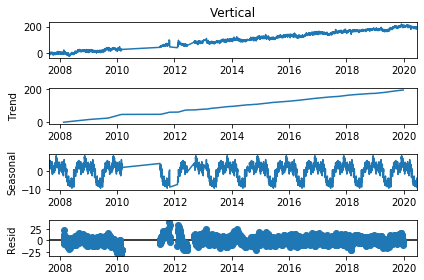

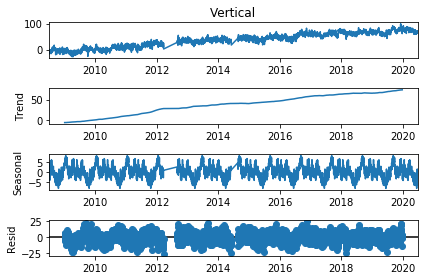

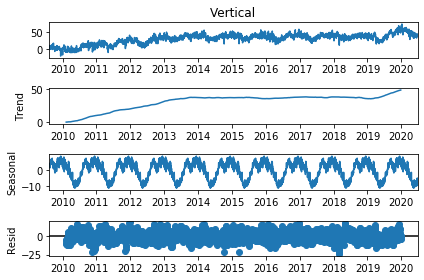

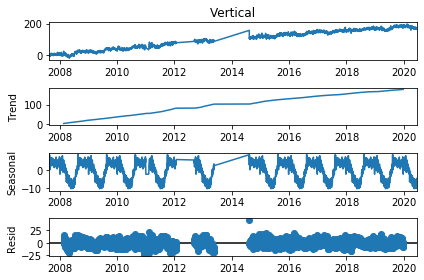

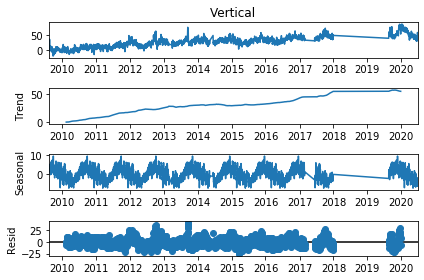

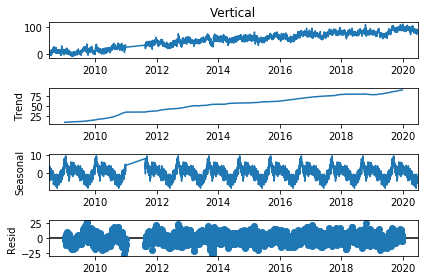

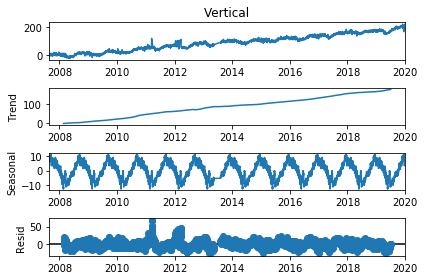

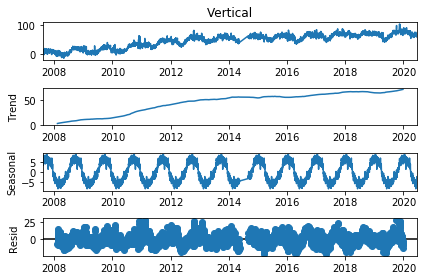

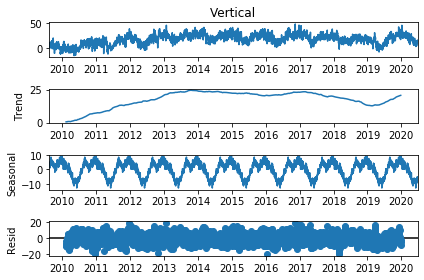

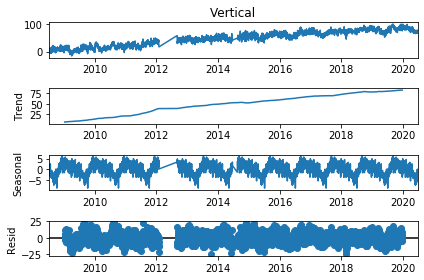

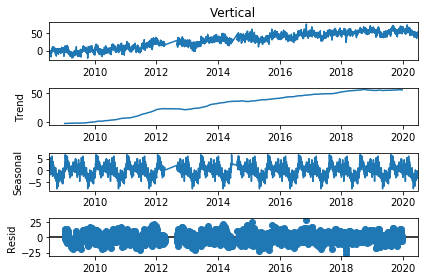

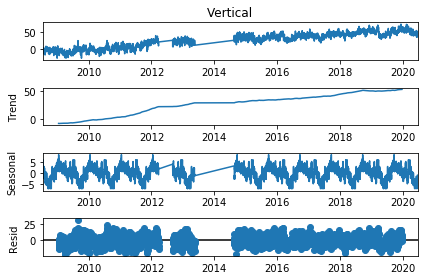

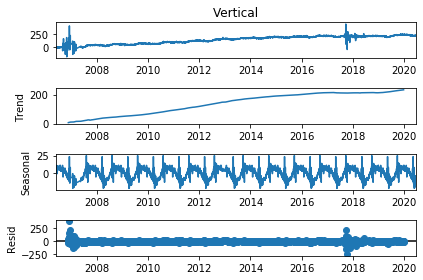

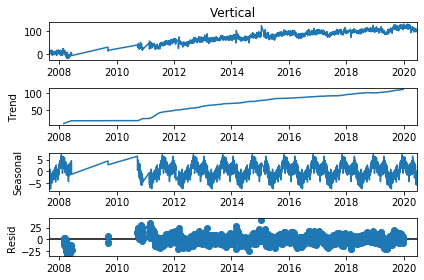

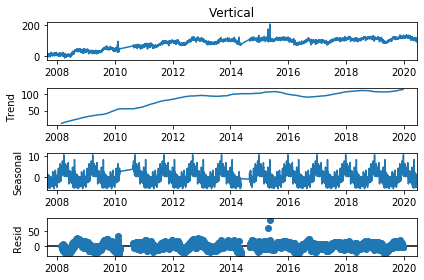

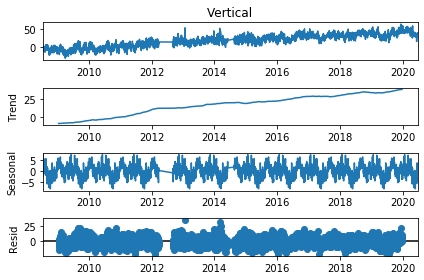

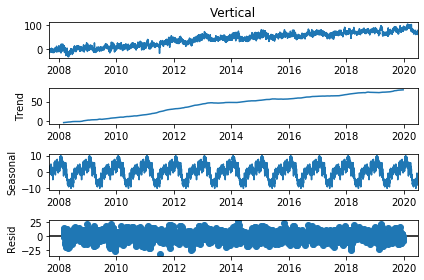

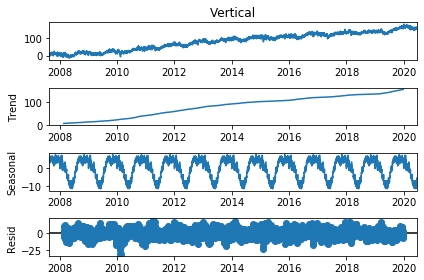

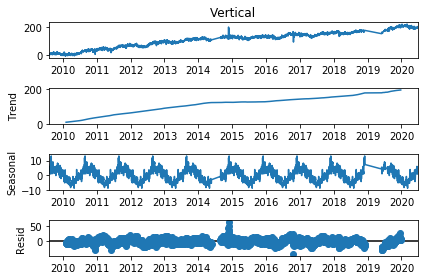

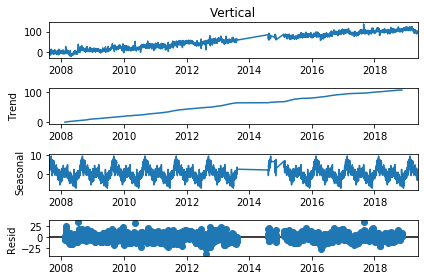

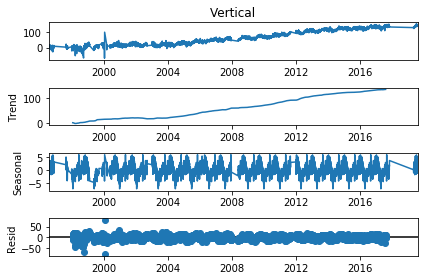

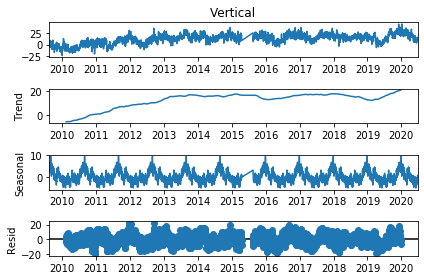

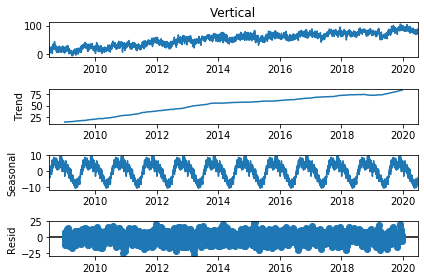

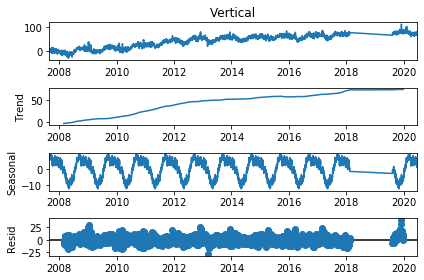

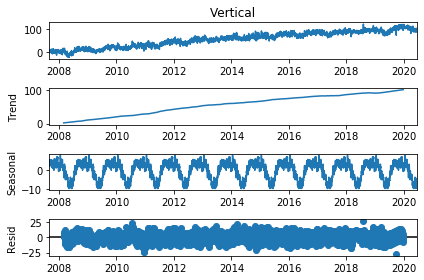

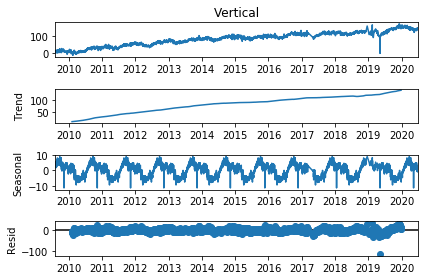

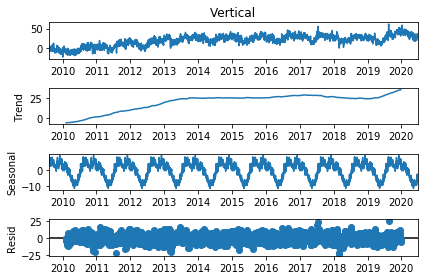

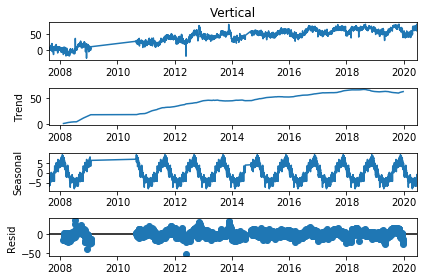

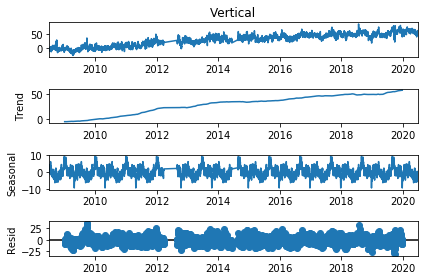

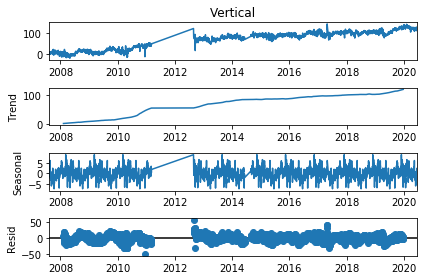

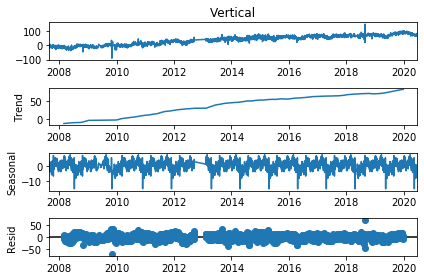

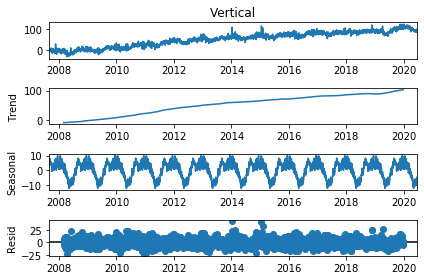

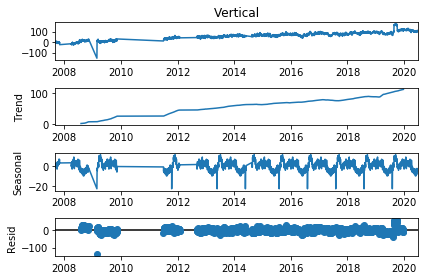

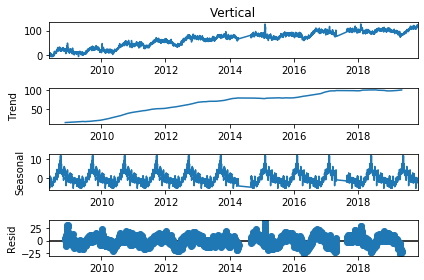

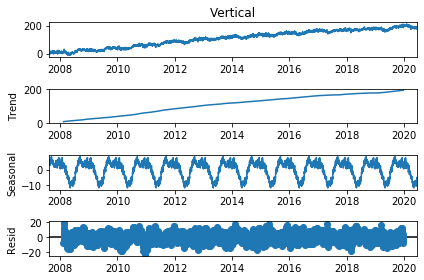

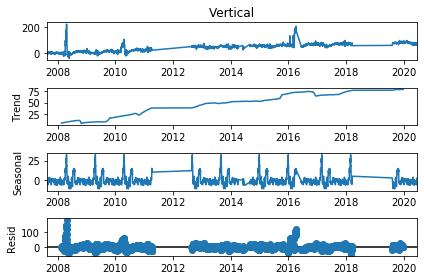

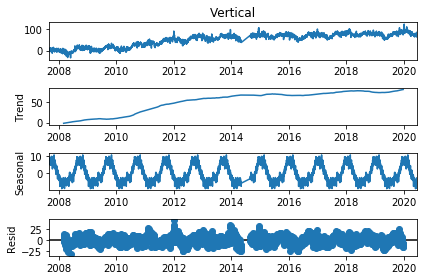

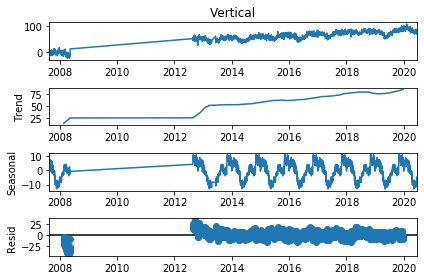

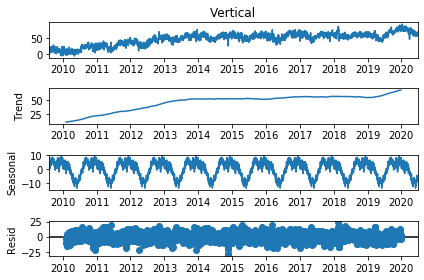

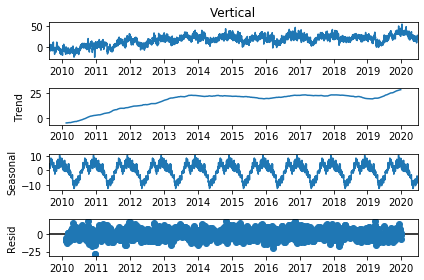

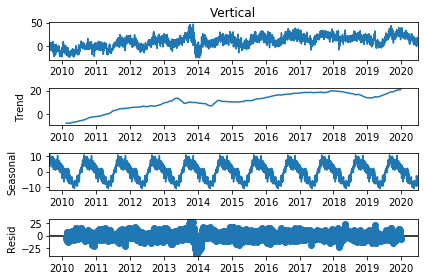

In [7]:
for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    df = read_GPS_nam14_UNAVCO(filepath)
    df = decompose(df, 'Vertical', filepath[-18:-14], 365)

In [8]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    return res

def test_plot_OLS(df, res, site, var, trend_array):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='trend', marker='.', linestyle='')
    ax.plot(df[var].dropna().index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var].dropna()))])
    # ax[1].plot(df['Vertical'].dropna().index, res.resid.values);
    # ax[1].plot(df['Vertical'].dropna().index, np.abs(res.resid.values));
    # ax[1].hlines(0, 0, len(res.resid), color='k');
    ax.set_title(f"Trend = {trend_array * 1:.2f} mm/yr");
    # ax[1].set_title("Residuals");
    plt.suptitle(f"{site}")
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    

In [9]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

In [ ]:
UNAVCO_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_nam14_UNAVCO(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    UNAVCO_trend_array[f] = convert_trend_toyearly(df, res)
    
    
    # Save site name
    site_name_array.append(filepath[-18:-14])
    
    print(f"Trend = {UNAVCO_trend_array[f] * 1:.2f} mm/yr")
#     print(res.summary())
   # np.savetxt('GPS_trend.csv', {sonel_trend_array[f] * 365:.2f}, delimiter=',')
    # Make Plot
    test_plot_OLS(df, res, filepath[-18:-14], 'Vertical', UNAVCO_trend_array[f])



data/GPS\ASKY.cwu.nam14.csv
f: 0
Trend = 19.67 mm/yr


data/GPS\BLAS.cwu.nam14.csv
f: 1
Trend = 7.85 mm/yr


data/GPS\DGJG.cwu.nam14.csv
f: 2
Trend = 3.69 mm/yr


data/GPS\DKSG.cwu.nam14.csv
f: 3
Trend = 18.71 mm/yr


data/GPS\GMMA.cwu.nam14.csv
f: 4
Trend = 6.17 mm/yr


data/GPS\GROK.cwu.nam14.csv
f: 5
Trend = 7.50 mm/yr


data/GPS\HEL2.cwu.nam14.csv
f: 6
Trend = 16.49 mm/yr


data/GPS\HJOR.cwu.nam14.csv
f: 7
Trend = 5.73 mm/yr


data/GPS\HMBG.cwu.nam14.csv
f: 8
Trend = 1.20 mm/yr


data/GPS\HRDG.cwu.nam14.csv
f: 9
Trend = 7.67 mm/yr


data/GPS\JGBL.cwu.nam14.csv
f: 10
Trend = 6.08 mm/yr


data/GPS\JWLF.cwu.nam14.csv
f: 11
Trend = 6.85 mm/yr


data/GPS\KAGA.cwu.nam14.csv
f: 12
Trend = 18.29 mm/yr


data/GPS\KAGZ.cwu.nam14.csv
f: 13
Trend = 9.59 mm/yr


data/GPS\KBUG.cwu.nam14.csv
f: 14
Trend = 7.90 mm/yr


data/GPS\KMJP.cwu.nam14.csv
f: 15
Trend = 4.71 mm/yr


data/GPS\KMOR.cwu.nam14.csv
f: 16
Trend = 7.29 mm/yr


data/GPS\KSNB.cwu.nam14.csv
f: 17
Trend = 12.86 mm/yr


data/GPS\KUAQ

C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LBIB.cwu.nam14.csv
f: 21
Trend = 1.97 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LEFN.cwu.nam14.csv
f: 22
Trend = 6.07 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\LYNS.cwu.nam14.csv
f: 23
Trend = 7.39 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MARG.cwu.nam14.csv
f: 24
Trend = 8.26 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MIK2.cwu.nam14.csv
f: 25
Trend = 12.78 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\MSVG.cwu.nam14.csv
f: 26
Trend = 3.20 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\NNVN.cwu.nam14.csv
f: 27
Trend = 5.58 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\NRSK.cwu.nam14.csv
f: 28
Trend = 5.87 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\PLPK.cwu.nam14.csv
f: 29
Trend = 11.42 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\QAAR.cwu.nam14.csv
f: 30
Trend = 8.63 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\RINK.cwu.nam14.csv
f: 31
Trend = 9.23 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SCBY.cwu.nam14.csv
f: 32
Trend = 10.59 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SENU.cwu.nam14.csv
f: 33
Trend = 9.23 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.




data/GPS\SRMP.cwu.nam14.csv
f: 34
Trend = 15.55 mm/yr


C:\Users\jhsan\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from tidegauge_functions import get_UNAVCO_headerinfo

UNAVCO_SiteID_array = []
UNAVCO_Lat_array = np.full(np.shape(filenames)[0], np.nan)
UNAVCO_Lon_array = np.full(np.shape(filenames)[0], np.nan)
UNAVCO_Height_array = np.full(np.shape(filenames)[0], np.nan)


for f, filepath in enumerate(filenames):
    a,b,c,d = get_UNAVCO_headerinfo(filenames[f])
    print('\n',a,b,c,d)
    temp_name, UNAVCO_Lat_array[f], UNAVCO_Lon_array[f], UNAVCO_Height_array[f] = \
        get_UNAVCO_headerinfo(filenames[f])
    #temp_name, temp_lat, temp_lon, temp_height = get_UNAVCO_headerinfo(filenames[f])



In [ ]:
#Write CSV trend array
columns = ['SITE', 'LAT', 'LON', 'Height', 'TREND_Vertical']
out_array = np.array([site_name_array, UNAVCO_Lat_array, UNAVCO_Lon_array, UNAVCO_Height_array, UNAVCO_trend_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_UNAVCO.csv')  # , na_rep=" ")